<a href="https://colab.research.google.com/github/yfhkucing/experiment_bms/blob/master/visualisasi_vxvy_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import joblib
import numpy as np
import pandas as pd

In [3]:
! unzip /content/models_vxvy_30_a06.zip

Archive:  /content/models_vxvy_30_a06.zip
replace content/models/model 4? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: content/models/model 4  
  inflating: content/models/model 20  
  inflating: content/models/model 3  
  inflating: content/models/model 6  
  inflating: content/models/model 21  
  inflating: content/models/model 27  
  inflating: content/models/model 1  
  inflating: content/models/model 7  
  inflating: content/models/model 22  
  inflating: content/models/model 2  
  inflating: content/models/model 8  
  inflating: content/models/model 0  
  inflating: content/models/model 25  
  inflating: content/models/model 16  
  inflating: content/models/model 13  
  inflating: content/models/model 19  
  inflating: content/models/model 17  
  inflating: content/models/model 18  
  inflating: content/models/model 9  
  inflating: content/models/model 24  
  inflating: content/models/model 23  
  inflating: content/models/model 29  
  inflating: content/models/model 12 

In [4]:
feature = pd.read_excel('data_model.xlsx',sheet_name='feature')
label = pd.read_excel('data_model.xlsx',sheet_name='label_30')

In [5]:
def norm(df):
  df=(df-df.min())/(df.max()-df.min())
  return df

def remap(df,new_max,new_min):
  df = (df-df.min())/(df.max()-df.min())*(new_max - new_min) + new_min
  return df

def rescale(df,new_max,new_min):
  df = df *(new_max - new_min) + new_min
  return df

from sklearn.preprocessing import StandardScaler
def standard(df):
  scaler = StandardScaler()
  df = scaler.fit_transform(df)
  return df

In [6]:
feature = norm(feature)

In [7]:
array_y = []
array_y_not_normal = []

for i in range(30):
  frame= label[i::30]
  frame = frame.drop(['koor_x','koor_y','Temp'],axis=1)
  array_y_not_normal.append(frame)
  frame = norm(frame)
  array_y.append(frame)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

skor_r2=[]
mae_=[]
rmse = []
y_predict = []
y_test = []
for i in range(30):
  x = np.array(feature)
  y = np.array(array_y[i])
  model = joblib.load(f'/content/content/models/model {i}')
  y_pred = model.predict(x)
  Skor_r2 = r2(y,y_pred)
  RMSE = mse(y,y_pred,squared=False)
  MAE = mae(y,y_pred)
  y_predict.append(y_pred)
  skor_r2.append(Skor_r2)
  mae_.append(MAE)
  rmse.append(RMSE)

In [9]:
skor_r2 = np.array(skor_r2)
rmse = np.array(rmse)
mae_=np.array(mae_)
y_predict = np.array(y_predict)
y = np.array(array_y)

In [10]:
y.shape,y_predict.shape

((30, 192, 2), (30, 192, 2))

In [11]:
#error per skenario

r_squared = []
abs_error = []
sqrt_error = []
indexing = 0,1
for i in range(192):
  a = y[...,i,indexing]
  b = y_predict[...,i,indexing]
  r_squared.append(r2(a,b))
  abs_error.append(mae(a,b))
  sqrt_error.append(mse(a,b))

In [12]:
error = pd.DataFrame(r_squared,columns=['r2'])
abs_error = pd.DataFrame(abs_error,columns=['mae'])
sqrt_error = pd.DataFrame(sqrt_error,columns=['rmse'])
error = error.join(abs_error)
error = error.join(sqrt_error)

In [13]:
error.describe()

,r2,mae,rmse
count,192.000000,192.000000,192.000000
mean,0.504520,0.126137,0.032587
std,0.375195,0.057419,0.027505
min,-0.564194,0.065093,0.006960
25%,0.222445,0.077169,0.010116
50%,0.770441,0.085682,0.013983
75%,0.804233,0.181968,0.056615
max,0.858391,0.272450,0.117653


In [14]:
error[error.r2 == error.r2.max()]

,r2,mae,rmse
105,0.858391,0.065093,0.00696


In [15]:
error[error.r2 == error.r2.min()]

,r2,mae,rmse
41,-0.564194,0.167355,0.080616


In [16]:
r2_matrix = skor_r2.reshape(5,6)
rmse_matrix = rmse.reshape(5,6)
mae_matrix = mae_.reshape(5,6)

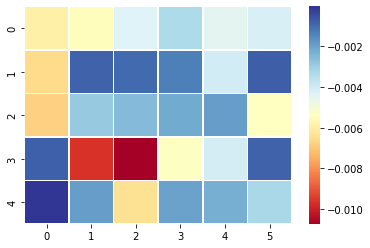

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(r2_matrix, linewidth=0.5, cmap="RdYlBu")
plt.show()

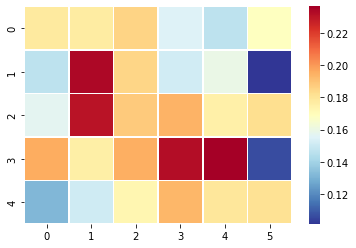

In [18]:
bx = sns.heatmap(rmse_matrix, linewidth=0.5, cmap="RdYlBu_r")
plt.show()

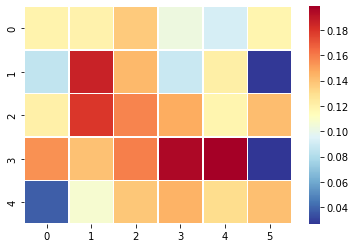

In [19]:
bx = sns.heatmap(mae_matrix, linewidth=0.5, cmap="RdYlBu_r")
plt.show()

In [20]:
df_koor = pd.read_excel('data_model.xlsx',sheet_name='koordinat_30')

In [21]:
def kec_angin(y,scenarios):
  df_x = pd.DataFrame(y[...,scenarios,0])
  df_y = pd.DataFrame(y[...,scenarios,1])
  df_y.rename(columns={0:1},inplace=True)
  df_x = df_x.join(df_y)
  df_x = df_x.join(df_koor)
  df_x.rename(columns={0:'Vx',1:'Vy',},inplace=True)
  return df_x

In [22]:
import plotly.graph_objects as go
from plotly.figure_factory import create_quiver

def tampilan_vektor(Y,scale,arrow):
  x = Y['koor_x']
  y = Y['koor_y']
  u = Y['Vx']
  v = Y['Vy']

  fig = create_quiver(x,y,u,v, scale=scale, arrow_scale=arrow)
  
  fig.show()

In [23]:
scenarios=0
angin_test = kec_angin(y,scenarios)
angin_pred = kec_angin(y_predict,scenarios)

In [24]:
tampilan_vektor(angin_test,50,0.1)

In [25]:
tampilan_vektor(angin_pred,50,0.1)